# Deep Learning
## HW1 - Problem 1 - Recommender System (100 + 20 pts)

### Please fill this part


1.   Full Name: Amirahmad Shafiee
2.   Student Number: 99104027


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import string
import re
import matplotlib.pyplot as plt
import math
from matplotlib import rc
from google.colab import drive
from sklearn.model_selection import train_test_split
import matplotlib.ticker as ticker
from math import sqrt


from sklearn.metrics import mean_squared_error

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.3)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

In [39]:
# Change the address as you wish
plays = pd.read_csv('./user_artists.dat', sep='\t')
artists = pd.read_csv('./artists.dat', sep='\t', usecols=['id','name'])

# Preprocessing (20 pts)

In [40]:
###############################################################################
## TODO: merge two DataSets in a way that below DataFrame is created         ##
###############################################################################

ap = pd.merge(artists,plays, how='inner', left_on = 'id', right_on = 'artistID')

In [41]:
ap

,id,name,userID,artistID,weight
0,1,MALICE MIZER,34,1,212
1,1,MALICE MIZER,274,1,483
2,1,MALICE MIZER,785,1,76
3,2,Diary of Dreams,135,2,1021
4,2,Diary of Dreams,257,2,152
...,...,...,...,...,...
92829,18741,Diamanda Galás,454,18741,301
92830,18742,Aya RL,454,18742,294
92831,18743,Coptic Rain,454,18743,287
92832,18744,Oz Alchemist,454,18744,286


In [42]:
###############################################################################
## TODO: rename the weight columns to PlayCount         ##
###############################################################################
ap = ap.rename(columns={"weight": "playCount"})

In [43]:
###############################################################################
## TODO: Delete the "id" columns and reset_indexes of ap                     ##
###############################################################################
ap.set_index('id' ,inplace = True)
#ap.reset_index(inplace=True)
ap
#TODO

,name,userID,artistID,playCount
id,,,,
1,MALICE MIZER,34,1,212
1,MALICE MIZER,274,1,483
1,MALICE MIZER,785,1,76
2,Diary of Dreams,135,2,1021
2,Diary of Dreams,257,2,152
...,...,...,...,...
18741,Diamanda Galás,454,18741,301
18742,Aya RL,454,18742,294
18743,Coptic Rain,454,18743,287


In [44]:
artists.set_index('id',inplace=True)

In [45]:
###############################################################################
## TODO: Create  a Dataframe like below where "totalUniqueUsers" is the number of
## userID's assigned to each name in "ap" dataframe.
## "totalArtistPlays" is sum of all playcounts assigned to an artist  
## and sort the Frame in descending order of "totalArtistPlays" (highest "totalArtistPlays" at top of table) 
## and "avgUserPlays" is divison of "totalArtistPlays" by "totalUniqueUsers"  
###############################################################################
artist_rank = pd.DataFrame(columns = {'name' , 'totalUniqueUsers' ,'totalArtistPlays','avgUserPlays'})
artist_rank['name'] = artists['name']
artist_rank.set_index('name' , inplace = True)
tuu = pd.DataFrame(ap.groupby('name' , sort=False)['artistID'].sum())
tap = pd.DataFrame(ap.groupby('name', sort=False)['playCount'].sum())
artist_rank['totalUniqueUsers'] = np.int64(tuu['artistID']/(artists.index))
artist_rank['totalArtistPlays'] = tap
artist_rank['avgUserPlays'] = artist_rank['totalArtistPlays'] / artist_rank['totalUniqueUsers']

In [46]:
artist_rank.sort_values("totalArtistPlays" , ascending = False, inplace = True)

In [47]:
artist_rank

,avgUserPlays,totalArtistPlays,totalUniqueUsers
name,,,
Britney Spears,4584.559387,2393140,522
Depeche Mode,4614.567376,1301308,282
Lady Gaga,2113.563011,1291387,611
Christina Aguilera,2600.503686,1058405,407
Paramore,2414.659148,963449,399
...,...,...,...
K-Precise,1.000000,1,1
ZÜNDER,1.000000,1,1
Evil Masquerade,1.000000,1,1


In [48]:
###############################################################################
## TODO: Create  a Dataframe like below where for each name in ap dataframe,
# corresponding row in artist rank is attached to it  
###############################################################################


df = pd.merge(ap.reset_index(),artist_rank, how='inner', left_on = 'name', right_on = 'name')

In [49]:
df.sort_values("playCount",inplace=True , ascending = False)
ap = df
ap

,id,name,userID,artistID,playCount,avgUserPlays,totalArtistPlays,totalUniqueUsers
2800,72,Depeche Mode,1642,72,352698,4614.567376,1301308,282
35843,792,Thalía,2071,792,324663,13462.884615,350035,26
27302,511,U2,1094,511,320725,2664.994595,493024,185
8152,203,Blur,1905,203,257978,2791.412281,318221,114
26670,498,Paramore,1664,498,227829,2414.659148,963449,399
...,...,...,...,...,...,...,...,...
38688,913,Destiny's Child,1810,913,1,418.626506,34746,83
32955,697,Sia,1290,697,1,492.803571,27597,56
71811,4988,Chris Spheeris,510,4988,1,621.200000,3106,5
91319,17080,Haylie Duff,1851,17080,1,1.000000,1,1


In [50]:
ap.head(20)

,id,name,userID,artistID,playCount,avgUserPlays,totalArtistPlays,totalUniqueUsers
2800,72,Depeche Mode,1642,72,352698,4614.567376,1301308,282
35843,792,Thalía,2071,792,324663,13462.884615,350035,26
27302,511,U2,1094,511,320725,2664.994595,493024,185
8152,203,Blur,1905,203,257978,2791.412281,318221,114
26670,498,Paramore,1664,498,227829,2414.659148,963449,399
21191,378,Evanescence,1146,378,203165,2272.017699,513476,226
14165,292,Christina Aguilera,514,292,176133,2600.503686,1058405,407
33309,701,Shakira,1983,701,172496,2158.398119,688529,319
33127,701,Shakira,757,701,169596,2158.398119,688529,319
31835,679,Glee Cast,1086,679,165902,2033.947791,506453,249


In [51]:
ap.head(20)

,id,name,userID,artistID,playCount,avgUserPlays,totalArtistPlays,totalUniqueUsers
2800,72,Depeche Mode,1642,72,352698,4614.567376,1301308,282
35843,792,Thalía,2071,792,324663,13462.884615,350035,26
27302,511,U2,1094,511,320725,2664.994595,493024,185
8152,203,Blur,1905,203,257978,2791.412281,318221,114
26670,498,Paramore,1664,498,227829,2414.659148,963449,399
21191,378,Evanescence,1146,378,203165,2272.017699,513476,226
14165,292,Christina Aguilera,514,292,176133,2600.503686,1058405,407
33309,701,Shakira,1983,701,172496,2158.398119,688529,319
33127,701,Shakira,757,701,169596,2158.398119,688529,319
31835,679,Glee Cast,1086,679,165902,2033.947791,506453,249


# Exploration

In [52]:
def bar_chart_int(x,y,x_label,y_label,title,caption,total_val):
    fig, ax = plt.subplots();
    fig.set_size_inches(16, 5);
    ax = sns.barplot(x[:20], y[:20], palette='Blues_r');
    ax.set_xlabel(x_label);
    ax.set_ylabel(y_label);
    ax.set_title(title);
    ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: '{:,}'.format(int(x))));

    # our bar label placement
    for p in ax.patches:
        height = p.get_height()
        pct = 100*(height/total_val)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}%'.format(pct),
                ha="center",verticalalignment='bottom',color='black', fontsize=12);

    # our caption statement
    ax.text(19, max(y[:20])*0.95, caption,horizontalalignment='right');

    plt.xticks(rotation=90);
    plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


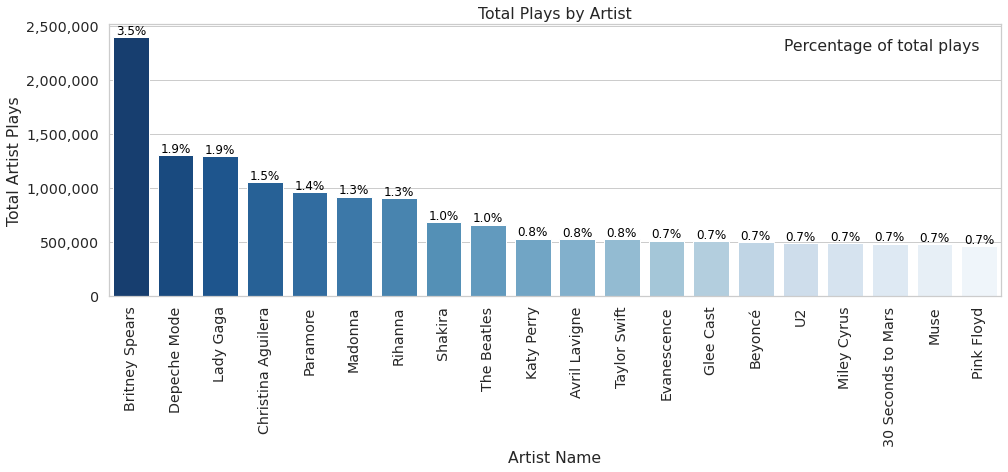

In [53]:
c1 = artist_rank
x = c1.index
y = c1.totalArtistPlays
x_label = 'Artist Name'
y_label = 'Total Artist Plays'
title = 'Total Plays by Artist'
caption = 'Percentage of total plays'
total_val = c1.totalArtistPlays.sum()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


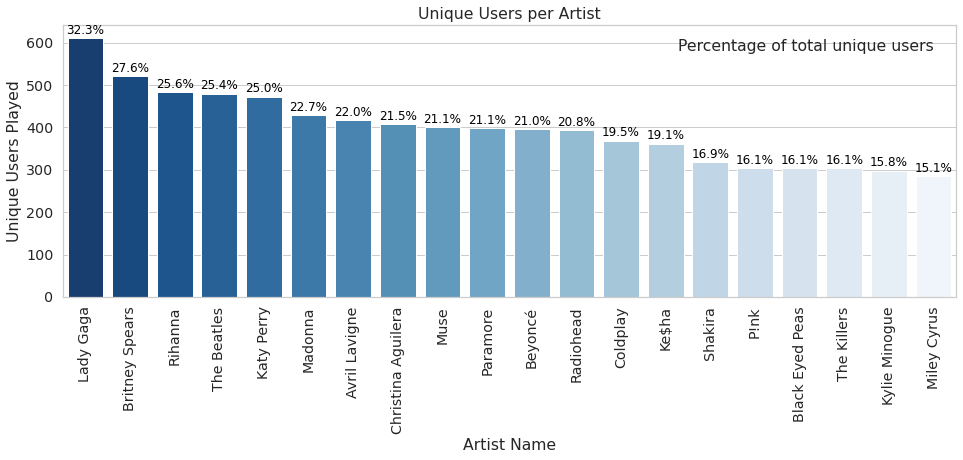

In [54]:
c2 = artist_rank.sort_values(['totalUniqueUsers'],ascending=False)
x = c2.index
y = c2.totalUniqueUsers
x_label = 'Artist Name'
y_label = 'Unique Users Played'
title = 'Unique Users per Artist'
caption = 'Percentage of total unique users'
total_val = ap.userID.nunique()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


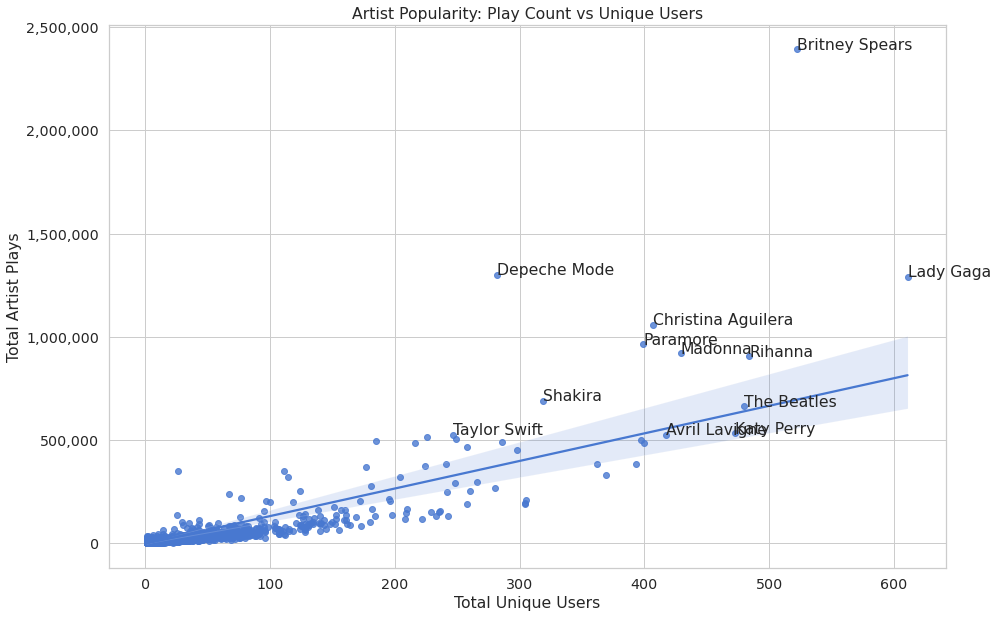

In [55]:
top_artists =  artist_rank[:12].index

x = artist_rank['totalUniqueUsers']
y =  artist_rank['totalArtistPlays']
labels =  artist_rank.index

fig, ax = plt.subplots(figsize=(15,10))
sns.regplot(x,y)
ax.set_title('Artist Popularity: Play Count vs Unique Users')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
ax.set_xlabel('Total Unique Users')
ax.set_ylabel('Total Artist Plays')

for i, t in enumerate(labels):
    if t in top_artists:
        ax.annotate(t,(x[i],y[i]))

# Preprocessing (30 pts)

In [56]:
ap.head(5)

,id,name,userID,artistID,playCount,avgUserPlays,totalArtistPlays,totalUniqueUsers
2800,72,Depeche Mode,1642,72,352698,4614.567376,1301308,282
35843,792,Thalía,2071,792,324663,13462.884615,350035,26
27302,511,U2,1094,511,320725,2664.994595,493024,185
8152,203,Blur,1905,203,257978,2791.412281,318221,114
26670,498,Paramore,1664,498,227829,2414.659148,963449,399


In [57]:
pc = ap.playCount 
play_count_scaled = (pc - pc.min()) / (pc.max() - pc.min())
ap = ap.assign(playCountScaled=play_count_scaled)

In [58]:
###############################################################################
## TODO: Create  a Dataframe with userID as its rows, artistID as its columns and
## "play_count_scaled" as the value of each cell, in this manner you're creating
## a table which demonstrates what rating each user has for a set of items(artists)
## Your created table should be like below example
###############################################################################
user = ap.userID.sort_values().unique()
artist = ap.artistID.sort_values().unique()
user = np.append(user , np.int64(np.zeros(artist.size-user.size)+2))
ratings_df = pd.DataFrame()
ratings_df['userID'] = user
ratings_df['artistID'] = artist
ratings_df['values'] = np.nan
ratings_df = ratings_df.pivot(index = 'userID' , columns = 'artistID' , values = 'values')
for i in ap.index:
  ratings_df.loc[ap['userID'][i],ap['artistID'][i]] = ap['playCountScaled'][i]
ratings_df

artistID,1,2,3,4,5,6,7,8,9,10,...,18736,18737,18738,18739,18740,18741,18742,18743,18744,18745
userID,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
ratings_df

artistID,1,2,3,4,5,6,7,8,9,10,...,18736,18737,18738,18739,18740,18741,18742,18743,18744,18745
userID,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
###############################################################################
# TODO: Fill each NaN value with 0 and return a numpy array corresponding modified DataFrame
###############################################################################


ratings = np.array(ratings_df.fillna(0))
ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00115397, ..., 0.        , 0.        ,
        0.        ]])

In [61]:
###############################################################################
# TODO : Calculate how sparse your data is (in percent) and print it, meaning 
# what fraction of the above table is filled with observed values.
###############################################################################

## Your Code
sparse_percentage = ap.shape[0] / (ratings.shape[0] * ratings.shape[1]) * 100
print(sparse_percentage)

## END

0.2782815119924182


In [62]:
MIN_USER_RATINGS = 35
DELETE_RATING_COUNT = 15

###############################################################################
# TODO : Complete the below function in way that, getting ratings array, creates
# two same size arrays as train and validation, and for the users in ratings array
# that have at least "MIN_USER_RATINGS" observed ratings, choose "DELETE_RATING_COUNT"
# of these ratings, make them zero in train table and put them in validation table
# return train and validation tables
###############################################################################

def train_test_split(ratings):
    train = ratings.copy()
    validation = ratings.copy()
    for i in range(train.shape[0]):
      if np.count_nonzero(train[i]) > MIN_USER_RATINGS :
        arr = np.nonzero(train[i])[0]
        indices = np.random.choice(arr,DELETE_RATING_COUNT,replace=False)
        pad_indices = np.setdiff1d(arr,indices)
        train[i][indices] = 0
        validation[i][pad_indices] = 0

    return train, validation

# Fitting(Training) Model (50pts)

In [63]:
train, val = train_test_split(ratings)

In [64]:
###############################################################################
# TODO : Complete below function in a way to return sqrt value of "mean_squared_error"
# between non-zero(observed) values of ground_truth and prediction. Note that you sould
# care about observed values of ground_truth table not prediction!
###############################################################################


def rmse(prediction, ground_truth):
    prediction = prediction[np.nonzero(ground_truth)]
    ground_truth = ground_truth[np.nonzero(ground_truth)]
    return sqrt(mean_squared_error(prediction, ground_truth))

In [100]:
class Recommender:
  
  def __init__(self, n_epochs=200, n_latent_features=3, lmbd=0.1, learning_rate=0.001):
    self.n_epochs = n_epochs
    self.n_latent_features = n_latent_features
    self.lmbd = lmbd
    self.learning_rate = learning_rate
  
  def predictions(self, P, Q):
    return P @ Q
  
  def fit(self, X_train, X_val):
    #TODO : Learn the model(P and Q) based on paper, you can initialize them with random gaussians
    train_nonzero = np.count_nonzero(X_train)
    val_nonzero = np.count_nonzero(X_val)
    train_mae = np.zeros(self.n_epochs)
    val_mae = np.zeros(self.n_epochs)
    X = np.nonzero(X_train)
    V = np.nonzero(X_val)
    P = np.abs(np.random.normal(0, .1, (X_train.shape[0], self.n_latent_features)))
    Q = np.abs(np.random.normal(0, .1, (self.n_latent_features, X_train.shape[1])))
    for epoch in range(self.n_epochs):
      preds = self.predictions(P,Q)
      for i in range(X[0].size):
          user = X[0][i]
          item = X[1][i]
          pred = preds[user,item]
          err = X_train[user,item] - pred
          train_mae[epoch] = train_mae[epoch] + abs(err)
          
          for factor in range(self.n_latent_features):
              Pf = P[user , factor]
              Qf = Q[factor , item]

              P[user, factor] += self.learning_rate * (err * Qf - self.lmbd * Pf)
              Q[factor , item] += self.learning_rate * (err * Pf - self.lmbd * Qf)
      for j in range(V[0].size):
          user = V[0][j]
          item = V[1][j]
          pred = preds[user,item]
          val_mae[epoch] = val_mae[epoch]+abs(X_train[user,item] - pred)
      if epoch % 10 == 0 :
        print("epoch : {} , train_mae : {} , val_mae : {}".format(epoch,train_mae[epoch]/train_nonzero , val_mae[epoch]/val_nonzero))
    val_mae = val_mae/val_nonzero
    train_mae = train_mae / train_nonzero
    self.P = P
    self.Q = Q
    #TODO : save the loss on train and validation data in each iteration
    return self , train_mae , val_mae

  def predict(self, X_train, user_index):
    indices = np.where(X_train[user_index, : ] == 0)[0]
    return self.predictions(self.P,self.Q)[user_index , indices]
    #TODO : return predicted ratings for unobserved values of specific user index

In [101]:
#creating recommender object
recommender , train_error , val_error = Recommender().fit(train, val)

epoch : 0 , train_mae : 0.01731741399812976 , val_mae : 0.018391742069681787
epoch : 10 , train_mae : 0.015589146923384012 , val_mae : 0.01660069479263264
epoch : 20 , train_mae : 0.0141739472546963 , val_mae : 0.015121742072358984
epoch : 30 , train_mae : 0.012991774097572973 , val_mae : 0.013874074541588127
epoch : 40 , train_mae : 0.01198536998824623 , val_mae : 0.012803045721248216
epoch : 50 , train_mae : 0.011115232557725988 , val_mae : 0.011870219334997465
epoch : 60 , train_mae : 0.01035526079342569 , val_mae : 0.011047737643948556
epoch : 70 , train_mae : 0.00968411739557214 , val_mae : 0.010315200294439046
epoch : 80 , train_mae : 0.009086562022208053 , val_mae : 0.009657232071551456
epoch : 90 , train_mae : 0.00854980692024988 , val_mae : 0.009061961702783713
epoch : 100 , train_mae : 0.008064855139045618 , val_mae : 0.008520093114668096
epoch : 110 , train_mae : 0.00762490351415883 , val_mae : 0.008024311845611174
epoch : 120 , train_mae : 0.007223284357955584 , val_mae : 0

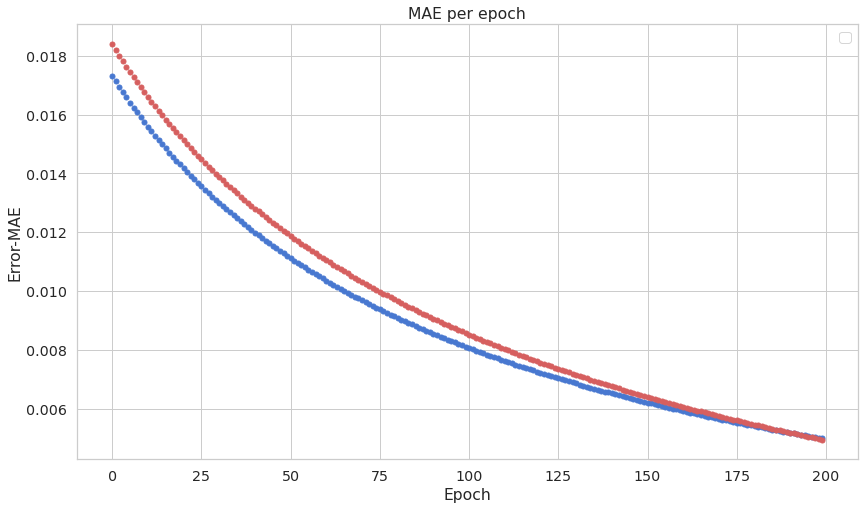

In [103]:
###############################################################################
# TODO : Plot the loss of train and loss
###############################################################################
train_label = "train_error"
val_label = "val_error"
X = np.arange(val_error.size)
y1 = train_error
y2 = val_error
plt.plot(X,y1,'bo',linewidth =1 , markersize = 5)
plt.plot(X,y2,'ro',linewidth =1 , markersize = 5)
plt.title("MAE per epoch")
plt.xlabel("Epoch")
plt.ylabel("Error-MAE")
plt.legend()
plt.show()
#TODO

# Bonus
**Can you improve the accuracy of model? If so, Do it and explain why it imporved! (Note that improvement must be noticable) (+10 pts)**

# Making recommendations

In [104]:
user_id = 1236
user_index = ratings_df.index.get_loc(user_id)
predictions_index = np.where(train[user_index, :] == 0)[0]

rating_predictions = recommender.predict(train, user_index)

In [105]:
def create_artist_ratings(artists_df, artists_index, ratings, n=10):
  artist_ids = ratings_df.columns[artists_index]
  artist_ratings = pd.DataFrame(data=dict(artistId=artist_ids, rating=ratings))
  top_n_artists = artist_ratings.sort_values("rating", ascending=False).head(n)
  
  artist_recommendations = artists_df[artists_df.id.isin(top_n_artists.artistId)].reset_index(drop=True)
  artist_recommendations['rating'] = pd.Series(top_n_artists.rating.values)
  return artist_recommendations.sort_values("rating", ascending=False)

In [75]:
artists.reset_index(inplace=True)

In [106]:
existing_ratings_index = np.where(train[user_index, :] > 0)[0]
existing_ratings = train[user_index, existing_ratings_index]

create_artist_ratings(artists, existing_ratings_index, existing_ratings)

,id,name,rating
0,7,Marilyn Manson,0.196486
1,472,3 Doors Down,0.043204
2,614,Pearl Jam,0.042016
3,923,Children of Bodom,0.025657
4,978,Disturbed,0.021690
5,1104,Rammstein,0.021562
6,1118,A Perfect Circle,0.020879
7,2172,Gojira,0.017051
8,6257,Rob Zombie,0.016280
9,6618,D12,0.010990


In [109]:
# Your Systems Recommendation for specific user_id on its unobserved ratings:
create_artist_ratings(artists, predictions_index, rating_predictions)

,id,name,rating
0,1213,Lush,0.026143
1,3325,放課後ティータイム,0.026046
2,4604,Kalisia,0.025523
3,10975,Leandra,0.025463
4,12471,GOCOO,0.024805
5,13201,Intricated,0.024530
6,13712,Leona Naess,0.024399
7,16523,Montefiori Cocktail,0.023717
8,17611,Sobota,0.023656
9,18360,Tete Montoliu,0.023574


# Bonus
**Whatever innovation you can the on representing results of your system visually (+5 pts, note that top visualizations in sense of innovation will get the point)**